### Análisis de Datos a través de Data México (Secretaría de Economía)

Autor: Ricardo Picazzo

Fecha: 03 Marzo, 2025

# Taqueros y Preparadores de Comida Rápida

## Introducción

Los datos sobre los taqueros y preparadores de comida rápida en México ofrecen una visión detallada de la evolución de sus salarios, condiciones laborales y distribución geográfica. Esta información, obtenida de Data México, permite analizar tendencias en el empleo, niveles de ingreso y la prevalencia de la informalidad en este sector, proporcionando un panorama clave para comprender su impacto en la economía nacional.

Nuestra tarea es determinar las condiciones de trabajo en las que viven los trabajadores de unos de los sectores más importantes de México

##### Preguntas Importantes

- ¿Cómo ha evolucionado el salario promedio de los taqueros y preparadores de comida rápida en los últimos años?
- ¿Cuál es el nivel de informalidad en este sector y cómo afecta las condiciones laborales de los trabajadores?
- ¿En qué estados de México se concentra la mayor cantidad de taqueros y dónde reciben los mejores salarios?
- ¿Cuál es la distribución por género en esta ocupación y cómo varía el salario entre hombres y mujeres?

### PREPARANDO EL AMBIENTE DE TRABAJO 
Para este trabajo estaremos utilizando las librerías de Python:
- Pandas - manipulación de datos
- Matplotlib - visualización de datos

In [103]:
# Se importan las librerías y alias para mejorar su lectura
import pandas as pd
import matplotlib.pyplot as plt

In [105]:
# Se leen los datos en formato CSV
bd_taquerias_empleo = pd.read_csv(r"C:\Users\ricky\OneDrive\Escritorio\PROGRAMMING PROJECTS\TAQUERIAS EN MEXICO\Evolucion-poblacion-ocupada-trabajadores-totales.csv")
bd_taquerias_informalidad = pd.read_csv(r"C:\Users\ricky\OneDrive\Escritorio\PROGRAMMING PROJECTS\TAQUERIAS EN MEXICO\Evolucion-de-la-informalidad-laboral-de-Taqueros-y-Preparadores-de-Comida-Rapida-Antojitos-Pizzas-Hot-Dogs-Jugos-Cafe-Etcetera-comparado-con-la-situacion-nacional.csv")

In [107]:
bd_taquerias_empleo.insert(1, 'Año', bd_taquerias_empleo['Quarter'].str.split('-').str[0])
bd_taquerias_empleo = bd_taquerias_empleo[['Occupation ID', 'Occupation', 'Quarter ID', 'Quarter', 'Año', 'Workforce', 'Monthly Wage', 'Time', 'type', 'type ID']]
bd_taquerias_empleo

,Occupation ID,Occupation,Quarter ID,Quarter,Año,Workforce,Monthly Wage,Time,type,type ID
0,5112,"Fonderos, Vendedores y Comerciantes de Comida",20123,2012-Q3,2012,270567,"3,197.86",1343797200000,"Fonderos, Vendedores y Comerciantes de Comida",5112
1,5112,"Fonderos, Vendedores y Comerciantes de Comida",20124,2012-Q4,2012,227164,"3,254.72",1351749600000,"Fonderos, Vendedores y Comerciantes de Comida",5112
2,5112,"Fonderos, Vendedores y Comerciantes de Comida",20131,2013-Q1,2013,233274,"3,006.91",1359698400000,"Fonderos, Vendedores y Comerciantes de Comida",5112
3,5112,"Fonderos, Vendedores y Comerciantes de Comida",20132,2013-Q2,2013,233191,"2,968.83",1367384400000,"Fonderos, Vendedores y Comerciantes de Comida",5112
4,5112,"Fonderos, Vendedores y Comerciantes de Comida",20133,2013-Q3,2013,227798,"3,209.24",1375333200000,"Fonderos, Vendedores y Comerciantes de Comida",5112
...,...,...,...,...,...,...,...,...,...,...
235,5116,Meseros,20233,2023-Q3,2023,615544,"4,636.79",1690869600000,Meseros,5116
236,5116,Meseros,20234,2023-Q4,2023,619237,"4,752.01",1698818400000,Meseros,5116
237,5116,Meseros,20241,2024-Q1,2024,622314,"5,163.85",1706767200000,Meseros,5116
238,5116,Meseros,20242,2024-Q2,2024,633592,"5,140.75",1714543200000,Meseros,5116


### 1. ¿Cómo ha evolucionado el salario promedio de los taqueros y preparadores de comida rápida en los últimos años?
Para encontrar el promedio utilizaremos la columna adicional de "Año" que creamos a partir de la columna Quarter, junto con la columna "Monthly Wage", para encontrar como ha ido evolucionando el salario promedio desde 2012 hasta 2024, siendo 12 años de diferencia.

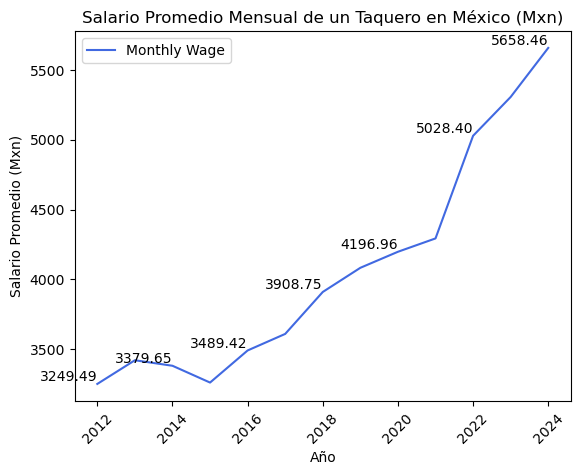

In [110]:
# ¿Cómo ha evolucionado el salario promedio de los taqueros y preparadores de comida rápida en los últimos años?
# ################################################  Salario Promedio de un Taquero en México   #########################################################

ocupacion = bd_taquerias_empleo.groupby(['Año']).mean(numeric_only=True)[['Monthly Wage']].reset_index()

# Convertir "Año" a tipo numérico (entero)
ocupacion["Año"] = pd.to_numeric(ocupacion["Año"])

TAQUERO_SALARIO_PROMEDIO = ocupacion.plot(x="Año", y="Monthly Wage", kind="line", legend = True, color='royalblue')

# Mostrar etiquetas SOLO para ciertos años (por ejemplo, cada 2 años)
for i, row in ocupacion.iterrows():
    if row["Año"] % 2 == 0:  # Solo años pares
        TAQUERO_SALARIO_PROMEDIO.text(row["Año"], row["Monthly Wage"], f'{row["Monthly Wage"]:.2f}', 
                ha='right', va='bottom', fontsize=10, color='black')

# Personalizar el gráfico
plt.xlabel("Año")
plt.ylabel("Salario Promedio (Mxn)")
### plt.yticks([10,20,30,40,50,60,70,80,90,100])
plt.title("Salario Promedio Mensual de un Taquero en México (Mxn)")
plt.xticks(rotation=45)  # Mantener los años bien alineados
plt.show()

##### PROMEDIO DE CRECIMIENTO


Tomando la diferencia entre el salario de 2024 y 2012: 
    5658.46 − 3249.49 = 2408.97
    
Calculé el procentaje de crecimiento respecto al salario inicial en 2012:
    (2408.97 / 3249.49 ) * 100

Esto nos dice  que el salario promedio ha aumentado:
#### 74.2% en 12 años

##### OBSERVACIONES
- Aumento del poder adquisitivo (relativo): El salario ha crecido aproximadamente un 74.2% en 12 años, lo que podría indicar mejoras en la valoración de esta ocupación o un ajuste gradual ante la inflación.

- Crecimiento acelerado en la última década: Mientras que entre 2012 y 2018 el salario creció en promedio $$659.26 MXN cada cuatro años, entre 2018 y 2024 el aumento fue mucho más pronunciado, alcanzando incrementos de $1,750 MXN en los últimos seis años. Esto puede estar relacionado con ajustes al salario mínimo, mayor demanda del sector o inflación.

- Impacto de la pandemia (2020-2022): El aumento de $831.44 MXN entre 2020 y 2022 es significativamente mayor a los incrementos anteriores, lo que podría reflejar un ajuste post-pandemia debido a la reactivación del sector restaurantero y la necesidad de atraer más trabajadores con mejores salarios.

- Aumento del costo de vida y ajustes salariales: La aceleración entre 2022 y 2024 ($630.06 MXN de aumento) podría estar influenciada por la inflación, los costos de insumos y posibles regulaciones laborales que impactan los sueldos en el sector informal.

### 2. ¿Cuál es el nivel de informalidad en este sector y cómo afecta las condiciones laborales de los trabajadores?

In [114]:
bd_taquerias_informalidad.insert(1, 'Año', bd_taquerias_empleo['Quarter'].str.split('-').str[0])

bd_taquerias_informalidad

,Year,Año,Quarter ID,Quarter,Workforce,Workforce Total,percentage,type,type ID,Time
0,"2,012.00",2012,20123,2012-Q3,559116,644760,0.87,"Taqueros y Preparadores de Comida Rápida, Anto...",5114,1343797200000
1,"2,012.00",2012,20124,2012-Q4,576253,666018,0.87,"Taqueros y Preparadores de Comida Rápida, Anto...",5114,1351749600000
2,"2,013.00",2013,20131,2013-Q1,598573,685648,0.87,"Taqueros y Preparadores de Comida Rápida, Anto...",5114,1359698400000
3,"2,013.00",2013,20132,2013-Q2,626959,726596,0.86,"Taqueros y Preparadores de Comida Rápida, Anto...",5114,1367384400000
4,"2,013.00",2013,20133,2013-Q3,598784,685180,0.87,"Taqueros y Preparadores de Comida Rápida, Anto...",5114,1375333200000
...,...,...,...,...,...,...,...,...,...,...
91,NaN,2023,20233,2023-Q3,32613863,59167472,0.55,Mexico,mex,1690869600000
92,NaN,2023,20234,2023-Q4,32533746,59403947,0.55,Mexico,mex,1698818400000
93,NaN,2024,20241,2024-Q1,32130251,59120905,0.54,Mexico,mex,1706767200000
94,NaN,2024,20242,2024-Q2,32190692,59327161,0.54,Mexico,mex,1714543200000


In [116]:
# Cargar los datos
bd_taquerias_informalidad_filtrado = bd_taquerias_informalidad.groupby(['Año', 'type'])['percentage'].mean(numeric_only=True).reset_index()

# Separar los datos por categoría
taqueros = bd_taquerias_informalidad_filtrado[bd_taquerias_informalidad_filtrado['type'] == 'Taqueros y Preparadores de Comida Rápida, Antojitos, Pizzas, Hot Dogs, Jugos, Café, Etcétera']
mexico = bd_taquerias_informalidad_filtrado[bd_taquerias_informalidad_filtrado['type'] == 'Mexico']

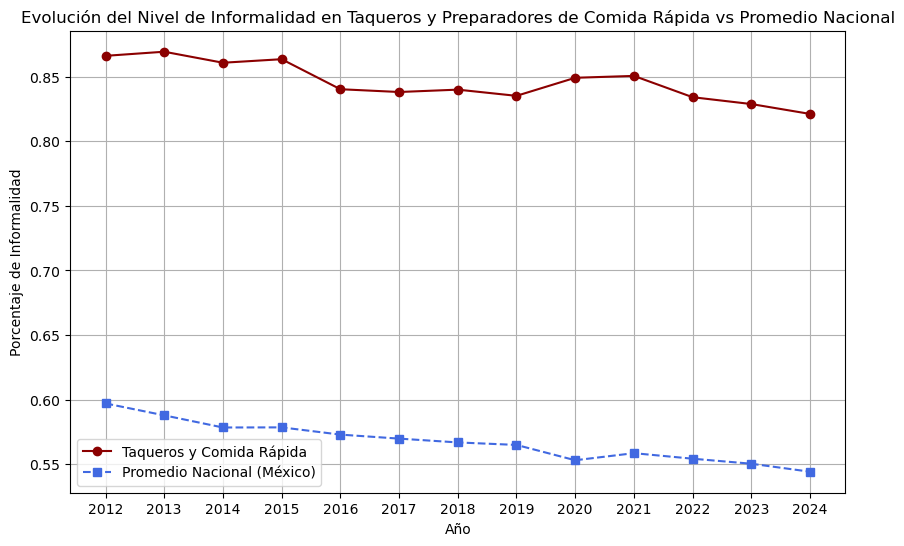

In [118]:
# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(taqueros['Año'], taqueros['percentage'], marker='o', linestyle='-', label='Taqueros y Comida Rápida', color='darkred')
plt.plot(mexico['Año'], mexico['percentage'], marker='s', linestyle='--', label='Promedio Nacional (México)', color='royalblue')

# Personalización del gráfico
plt.xlabel("Año")
plt.ylabel("Porcentaje de Informalidad")
plt.title("Evolución del Nivel de Informalidad en Taqueros y Preparadores de Comida Rápida vs Promedio Nacional")
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

##### OBSERVACIONES
###### Alta informalidad en el sector de taqueros y comida rápida
- Se observa que el porcentaje de informalidad en este sector ha sido consistentemente alto, manteniéndose por encima del 80% en todo el período.
- Esto sugiere que la mayoría de los trabajadores en este sector no tienen acceso a prestaciones laborales como seguro social, contratos formales o jubilación.

###### Tendencia a la baja en la informalidad nacional, pero no tan marcada en taquerías
- A nivel nacional, la informalidad ha disminuido gradualmente, pasando de cerca del 60% en 2012 a menos del 55% en 2024.
- Sin embargo, en el sector de taqueros y comida rápida, aunque hay una leve reducción después de 2016, la caída es mucho menos pronunciada.

###### Impacto en las condiciones laborales
- La persistencia de la informalidad en este sector implica baja estabilidad laboral, menores ingresos asegurados, y falta de acceso a beneficios sociales, lo que podría afectar la calidad de vida de estos trabajadores.
- A pesar de esto, la informalidad también puede reflejar flexibilidad laboral y menores barreras de entrada, permitiendo que más personas trabajen en este sector sin requisitos estrictos.

###### Diferencia estructural entre el sector y la economía en general
- Mientras que el promedio nacional ha mostrado una reducción constante en la informalidad, el sector de comida rápida parece resistirse al cambio, lo que sugiere que los esfuerzos de formalización no han tenido el mismo impacto en este tipo de empleo.

### 3. ¿En qué estados de México se concentra la mayor cantidad de taqueros y dónde reciben los mejores salarios?

Para la siguiente pregunta estaremos utilizando una nueva librería para poder generar un mapa geográfico de México
- Geopandas

In [123]:
import geopandas as gpd
import folium
from osgeo import gdal

In [125]:
bd_taqueros_estados = pd.read_csv(r"C:\Users\ricky\OneDrive\Escritorio\PROGRAMMING PROJECTS\TAQUERIAS EN MEXICO\BASES DE DATOS\3. ¿En qué estados de México se concentra la mayor cantidad de taqueros y dónde reciben los mejores salarios\Poblacion-ocupada-durante-el-2024-T3.csv")
bd_taqueros_estados_salarios = pd.read_csv(r"C:\Users\ricky\OneDrive\Escritorio\PROGRAMMING PROJECTS\TAQUERIAS EN MEXICO\BASES DE DATOS\3. ¿En qué estados de México se concentra la mayor cantidad de taqueros y dónde reciben los mejores salarios\Salarios-en-2024-T3.csv")

In [127]:
gdal.SetConfigOption('SHAPE_RESTORE_SHX', 'YES')
estados = gpd.read_file("C:/Users/ricky/OneDrive/Escritorio/PROGRAMMING PROJECTS/TAQUERIAS EN MEXICO/BASES DE DATOS/3. ¿En qué estados de México se concentra la mayor cantidad de taqueros y dónde reciben los mejores salarios/mexican-states.shp")

In [128]:
bd_taqueros_estados_salarios

,Occupation ID,Occupation,State ID,State,Quarter ID,Quarter,Monthly Wage,Monthly Wage Growth,Monthly Wage Growth Value,lastSalary
0,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",1,Aguascalientes,20243,2024-Q3,"4,420.77",0.02,99.90,"4,320.87"
1,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",2,Baja California,20243,2024-Q3,"7,685.37",0.17,"1,138.43","6,546.94"
2,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",3,Baja California Sur,20243,2024-Q3,"10,431.97",0.22,"1,857.00","8,574.97"
3,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",4,Campeche,20243,2024-Q3,"6,693.83",0.10,583.32,"6,110.50"
4,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",5,Coahuila de Zaragoza,20243,2024-Q3,"7,558.42",0.15,961.75,"6,596.67"
5,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",6,Colima,20243,2024-Q3,"7,219.68",0.13,842.77,"6,376.91"
6,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",7,Chiapas,20243,2024-Q3,"6,468.89",0.27,"1,371.13","5,097.76"
7,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",8,Chihuahua,20243,2024-Q3,"5,667.19",-0.28,"-2,168.07","7,835.26"
8,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",9,Ciudad de México,20243,2024-Q3,"3,961.68",-0.22,"-1,130.40","5,092.08"
9,5114,"Taco and Preparers Fast Food, Snacks, Pizzas, ...",10,Durango,20243,2024-Q3,"6,895.72",0.00,1.73,"6,893.99"


In [129]:
pd.options.display.float_format = "{:,.2f}".format

In [133]:
estados["Estado"] = bd_taqueros_estados["State"]
estados["Trabajadores"] = bd_taqueros_estados["lastWorkforce"]
estados["Ultimo Salario"] = bd_taqueros_estados_salarios['lastSalary']
estados = estados[['Estado', 'Trabajadores', 'Ultimo Salario', 'geometry']]
estados

,Estado,Trabajadores,Ultimo Salario,geometry
0,Aguascalientes,13283,"4,320.87","POLYGON ((-102.74530 21.72005, -102.74859 21.7..."
1,Baja California,22515,"6,546.94","MULTIPOLYGON (((-103.48859 18.96489, -103.4884..."
2,Baja California Sur,6304,"8,574.97","POLYGON ((-98.54150 19.46082, -98.54158 19.460..."
3,Campeche,10798,"6,110.50","POLYGON ((-99.27870 19.13170, -99.28259 19.138..."
4,Coahuila de Zaragoza,32980,"6,596.67","POLYGON ((-98.90339 19.03848, -98.90061 19.038..."
5,Colima,6784,"6,376.91","POLYGON ((-100.13794 20.04431, -100.13759 20.0..."
6,Chiapas,38535,"5,097.76","POLYGON ((-99.73527 20.56486, -99.73525 20.564..."
7,Chihuahua,24276,"7,835.26","POLYGON ((-97.26671 19.38249, -97.26549 19.381..."
8,Ciudad de México,91249,"5,092.08","POLYGON ((-99.94766 23.49713, -99.94611 23.490..."
9,Durango,18360,"6,893.99","POLYGON ((-103.50895 25.27801, -103.50984 25.2..."


Text(0.5, 1.0, 'Estados de México por numero de trabajadores')

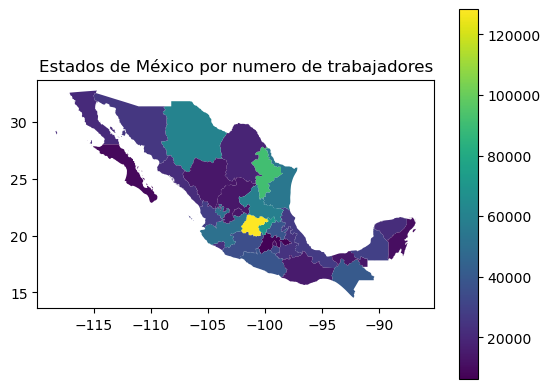

In [134]:
estados.plot("Trabajadores", legend=True)

plt.title("Estados de México por numero de trabajadores")

Text(0.5, 1.0, 'Estados de México por numero de trabajadores')

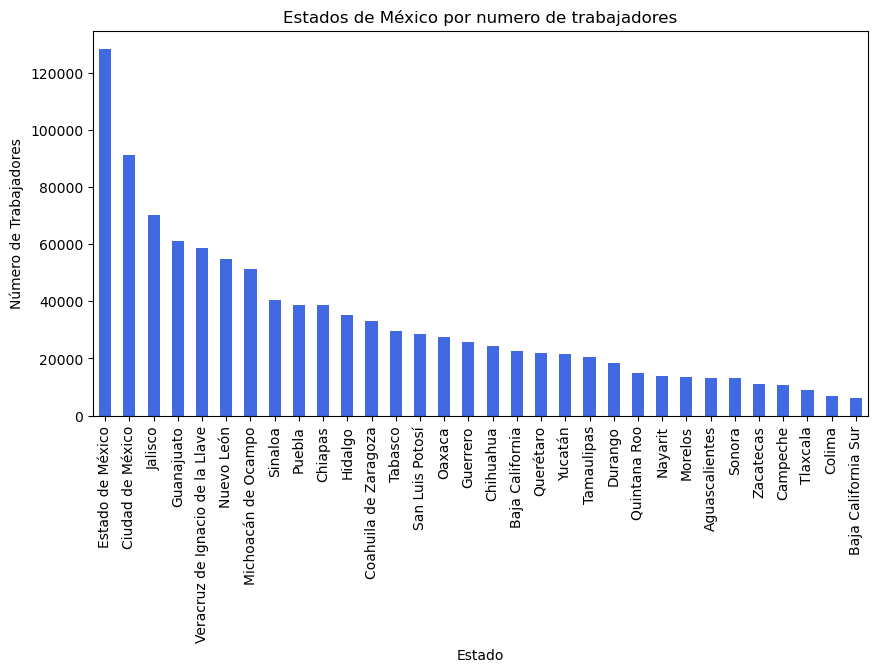

In [135]:
# Agrupar por año y sumar todos los delitos
estados_agrupado = estados.groupby("Estado")["Trabajadores"].sum()
estados_agrupado = estados_agrupado.sort_values(ascending=False)

estados_agrupado = estados_agrupado.plot(kind='bar',figsize=(10, 5), x='Estado', y='Trabajadores', legend=False, color='royalblue')

# Personalizar etiquetas y título
estados_agrupado.set_xlabel("Estado")
estados_agrupado.set_ylabel("Número de Trabajadores")
estados_agrupado.set_title("Estados de México por numero de trabajadores")

Text(0.5, 1.0, 'Estados de México por promedio de Salario')

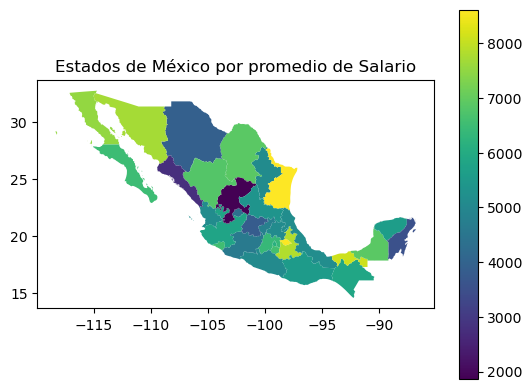

In [136]:
estados.plot("Ultimo Salario", legend=True)

plt.title("Estados de México por promedio de Salario")

Text(0.5, 1.0, 'Estados de México por Promedio de Ingresos')

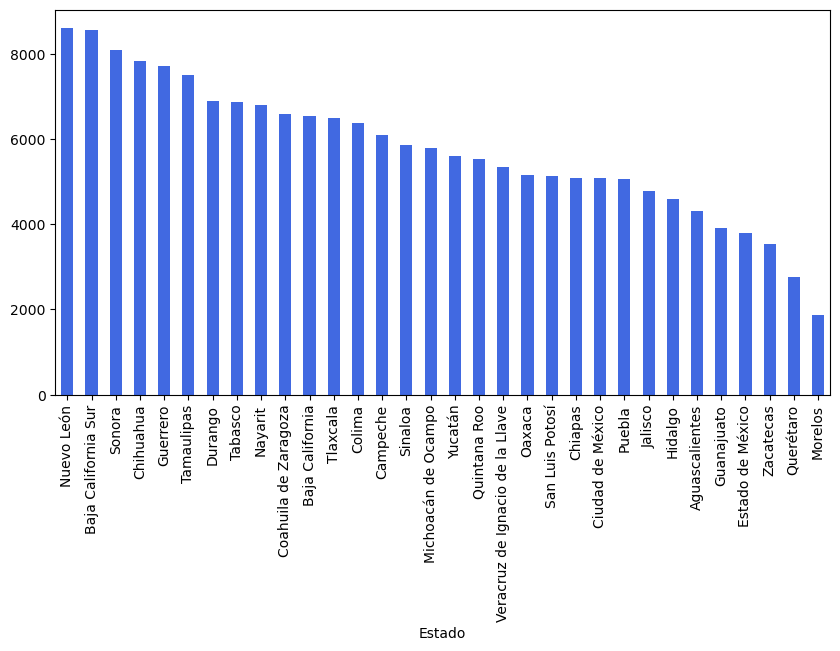

In [137]:
# Agrupar por año y sumar todos los delitos
estados_agrupado_salario = estados.groupby("Estado")["Ultimo Salario"].sum()
estados_agrupado_salario = estados_agrupado_salario.sort_values(ascending=False)

estados_agrupado_salario = estados_agrupado_salario.plot(kind='bar',figsize=(10, 5), x='Estado', y='Salario', legend=False, color='royalblue')

# Personalizar etiquetas y título
estados_agrupado.set_xlabel("Estado")
estados_agrupado.set_ylabel("Promedio de Ingresos")
estados_agrupado.set_title("Estados de México por Promedio de Ingresos")

##### OBSERVACIONES
###### ¿En qué estados se concentra la mayor cantidad de taqueros?
1. Estado de México : 128249
2. Ciudad de México : 91249
3. Jalisco : 70278
4. Guanajuato : 61060
5. Veracruz : 58667
6. Nuevo León : 54847

###### ¿Dónde reciben los mejores salarios?
1. Nuevo León : 8,616.20
2. Baja California Sur : 8,574.97
3. Sonora : 8,108.74
4. Chihuahua : 7,835.26
5. Guerrero : 7,712.35
6. Tamaulipas : 7,520.79

### 4. ¿Cuál es la distribución por género en esta ocupación y cómo varía el salario entre hombres y mujeres?

In [145]:
bd_taquerias_diversidad = pd.read_csv(r"C:\Users\ricky\OneDrive\ESCRIT~1\PROGRA~1\TAQUER~1\BASESD~1\410F2~1.CUL\SALARI~1.CSV")

In [147]:
bd_taquerias_diversidad

,Age Range ID,Age Range,Sex ID,Sex,Monthly Wage,Workforce,Number of Records,Workforce Total,percentage
0,1,15 a 24 años,1,Hombre,"5,106.94",85136,326,165512,51.44
1,1,15 a 24 años,2,Mujer,"4,387.04",80376,267,165512,48.56
2,2,25 a 34 años,1,Hombre,"7,570.92",80250,270,188384,42.60
3,2,25 a 34 años,2,Mujer,"5,166.22",108134,370,188384,57.40
4,3,35 a 44 años,1,Hombre,"8,523.42",68057,237,216595,31.42
5,3,35 a 44 años,2,Mujer,"5,310.77",148538,499,216595,68.58
6,4,45 a 54 años,1,Hombre,"5,773.92",71867,212,222457,32.31
7,4,45 a 54 años,2,Mujer,"5,461.48",150590,561,222457,67.69
8,5,55 a 64 años,1,Hombre,"7,877.62",43572,121,161800,26.93
9,5,55 a 64 años,2,Mujer,"4,358.56",118228,383,161800,73.07


Text(0.5, 1.0, 'Distribución por Genero')

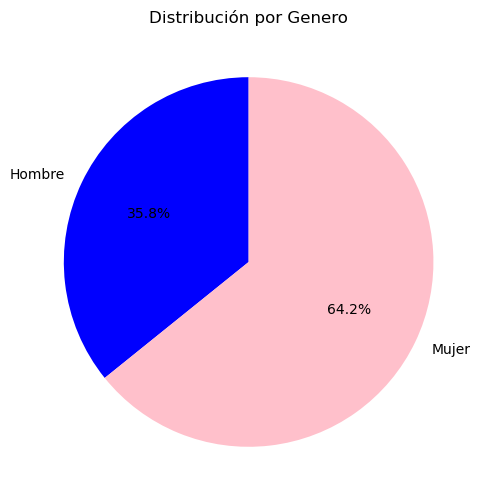

In [157]:
# Agrupar por "Sex" y sumar "Workforce Total"
workforce_sex = bd_taquerias_diversidad.groupby("Sex")["Workforce"].sum()

# Crear el pie chart
plt.figure(figsize=(6,6))
plt.pie(workforce_sex, labels=workforce_sex.index, autopct='%1.1f%%', colors=["blue", "pink"], startangle=90)

# Título del gráfico
plt.title("Distribución por Genero")

(array([0, 1]), [Text(0, 0, 'Hombre'), Text(1, 0, 'Mujer')])

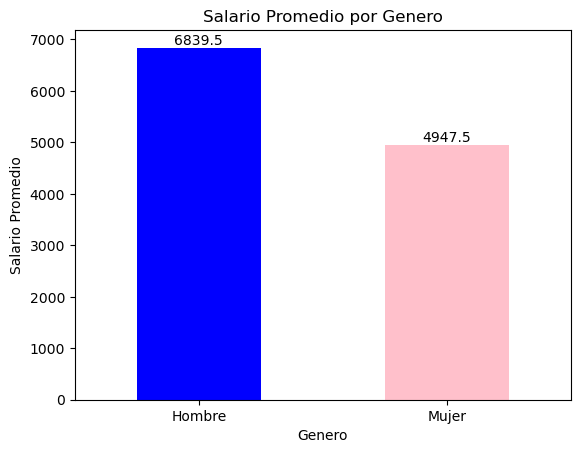

In [185]:
workforce_sex_salary_ax = workforce_sex_salary.plot(kind='bar', x='Sex', y='Monthly Wage', legend=False, color=["blue", "pink"])

# Personalizar el gráfico
workforce_sex_salary_ax.bar_label(ax.containers[0], fmt="%.1f")  # Agregar valores sobre las barras

workforce_sex_salary_ax.set_xlabel("Genero")
workforce_sex_salary_ax.set_ylabel("Salario Promedio")

# Título del gráfico
plt.title("Salario Promedio por Genero")

plt.xticks(rotation=360)  # Rotar etiquetas del eje X si es necesario para mejor legibilidad

##### OBSERVACIONES
###### ¿Cuál es la distribución por género en esta ocupación?
- HOMBRES : 35.8%
- MUJERES : 64.2%

###### ¿Cómo varía el salario entre hombres y mujeres?
- HOMBRES : 6839.5 mxn/mes
- MUJERES : 4947.5 mxn/mes